![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [11]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [14]:
# Set the style for the plots
sns.set(style="whitegrid")

In [12]:
# Start coding here
# Use as many cells as you need
print(crimes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB
None


In [13]:
# Process TIME OCC and HOUR OCC using to_datetime
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M')

# Extract the hour and time from the datetime object
crimes['HOUR OCC'] = crimes['TIME OCC'].dt.hour
crimes['TIME OCC'] = crimes['TIME OCC'].dt.time

# Print the resulting columns
print(crimes[['HOUR OCC', 'TIME OCC']])

        HOUR OCC  TIME OCC
0             11  11:10:00
1             16  16:20:00
2             12  12:00:00
3              6  06:35:00
4              9  09:00:00
...          ...       ...
185710        11  11:00:00
185711        18  18:00:00
185712        10  10:00:00
185713        16  16:30:00
185714         9  09:00:00

[185715 rows x 2 columns]


## 1. Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour.`

In [21]:
# Count the frequency of crimes by hour
peak_crime_hour = crimes['HOUR OCC'].value_counts().sort_index()
print(f"Highest freqyency hour: {peak_crime_hour.idxmax()}")

Highest freqyency hour: 12


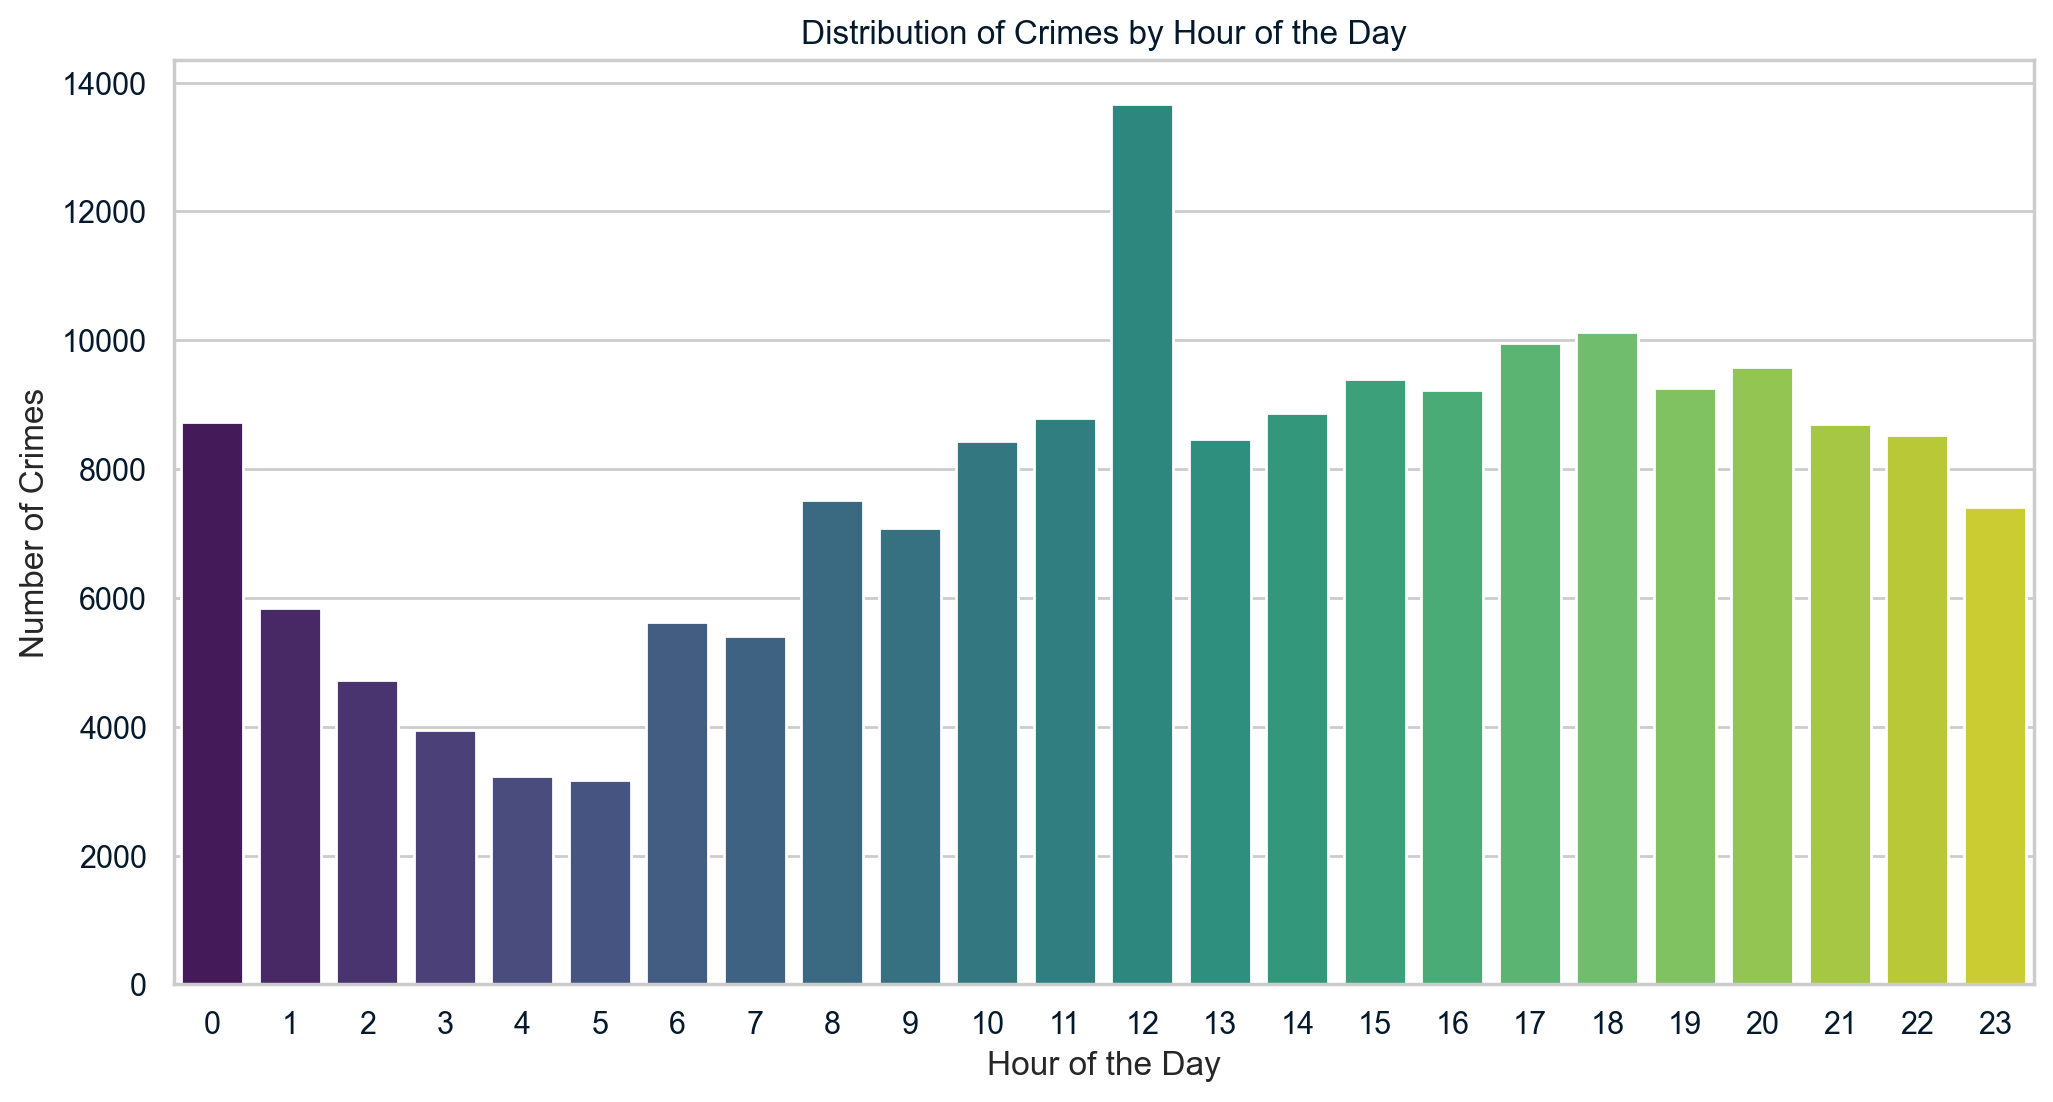

In [19]:
# Plot the distribution of crimes by hour
plt.figure(figsize=(12, 6))
sns.barplot(x=peak_crime_hour.index, y=peak_crime_hour.values, palette="viridis")
plt.title('Distribution of Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.show()

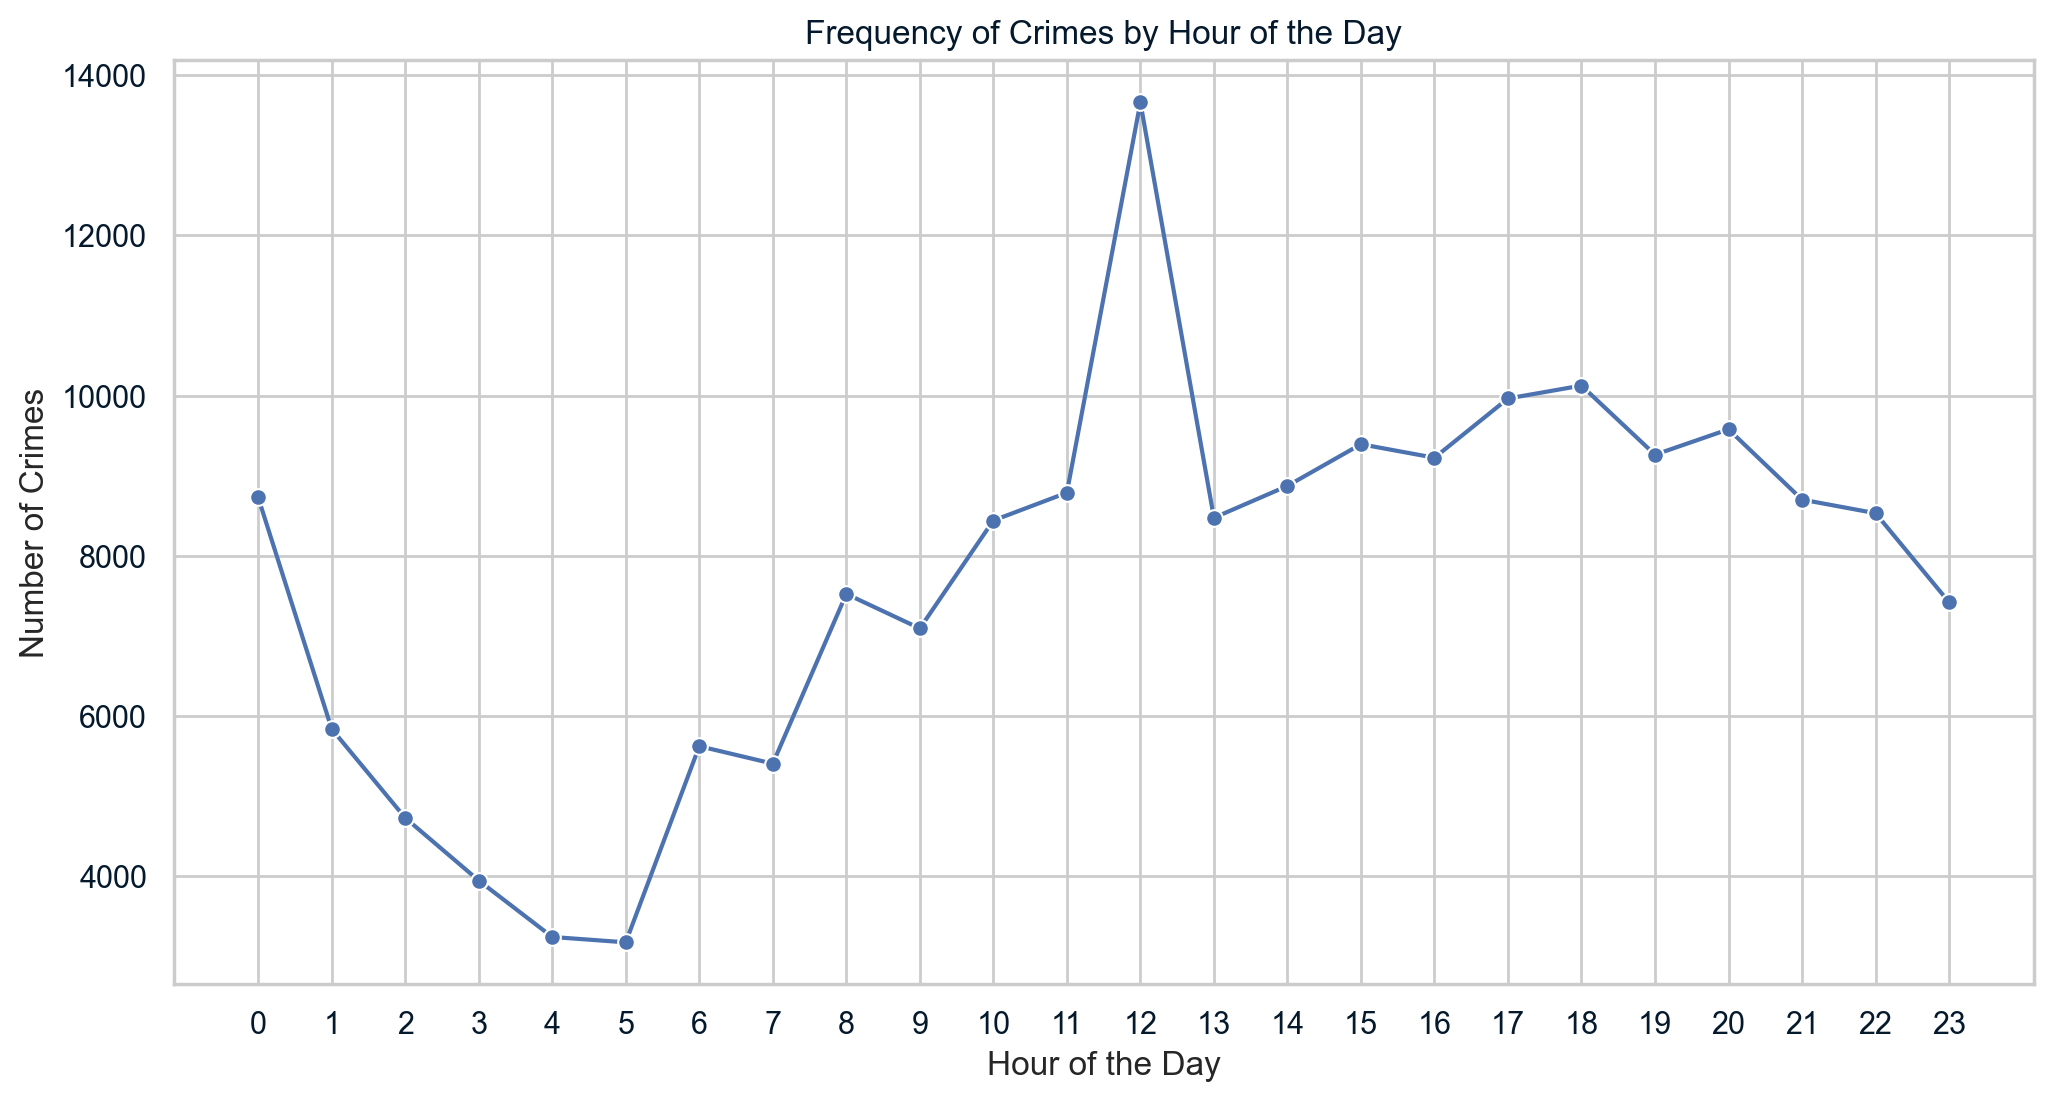

In [20]:
# Plot a line graph for the frequency of crimes by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x=peak_crime_hour.index, y=peak_crime_hour.values, marker='o', color='b')
plt.title('Frequency of Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Answer 1 - The hour with the highest frequency of crimes is: 12
-----------------------

## 2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

In [26]:
# Define the start and end times for the night period
night_start_time = pd.to_datetime('22:00').time()
night_end_time = pd.to_datetime('03:59').time()

# Filter the night crimes
night_crimes = crimes[(crimes['TIME OCC'] >= night_start_time) | (crimes['TIME OCC'] <= night_end_time)]
night_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
8,231207476,2023-02-27,2020-08-15,00:01:00,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,01:55:00,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,00:01:00,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,23:05:00,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,00:01:00,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0


In [27]:
peak_night_crime_location = night_crimes['AREA NAME'].mode()[0]
print(f"Area: {peak_night_crime_location}")

Area: Central


In [23]:
# Count the frequency of night crimes by area
night_crime_areas = night_crimes['AREA NAME'].value_counts()

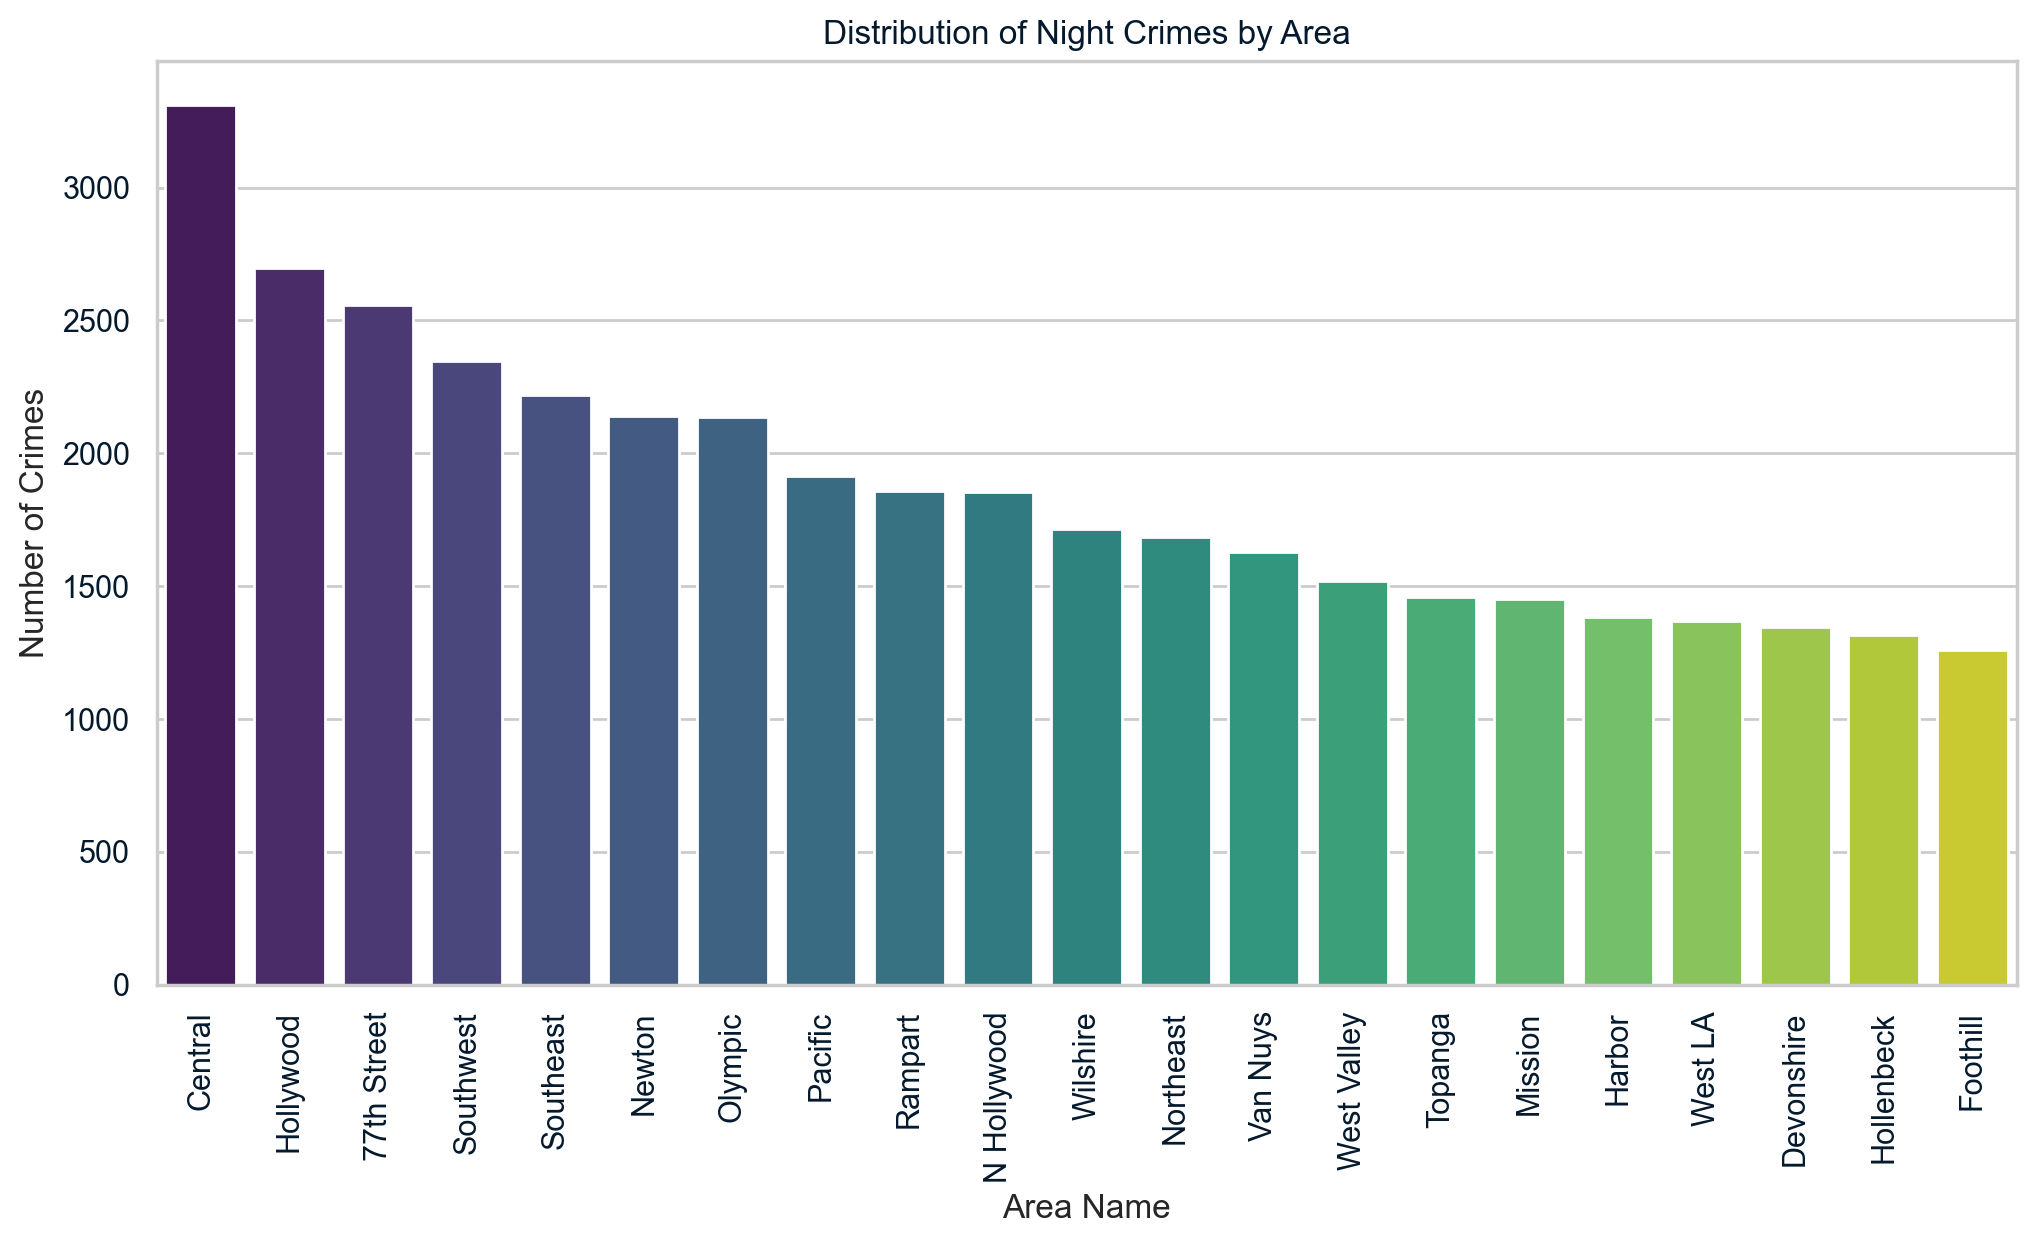

In [24]:
# Plot the distribution of night crimes by area
plt.figure(figsize=(12, 6))
sns.barplot(x=night_crime_areas.index, y=night_crime_areas.values, palette="viridis")
plt.title('Distribution of Night Crimes by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

## Answer 2 - The area with the highest frequency of night crimes is: Central
-------------------------------

## 3. Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [29]:
# Define ages groups
age_bins = [0,17,25,34,44,54,64,float('inf')]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes['age_group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

In [30]:
# Categorize victim ages into age groups
crimes['age_group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

In [31]:
# Count the frequency of crimes for each age group
victim_ages = crimes['age_group'].value_counts().sort_index()

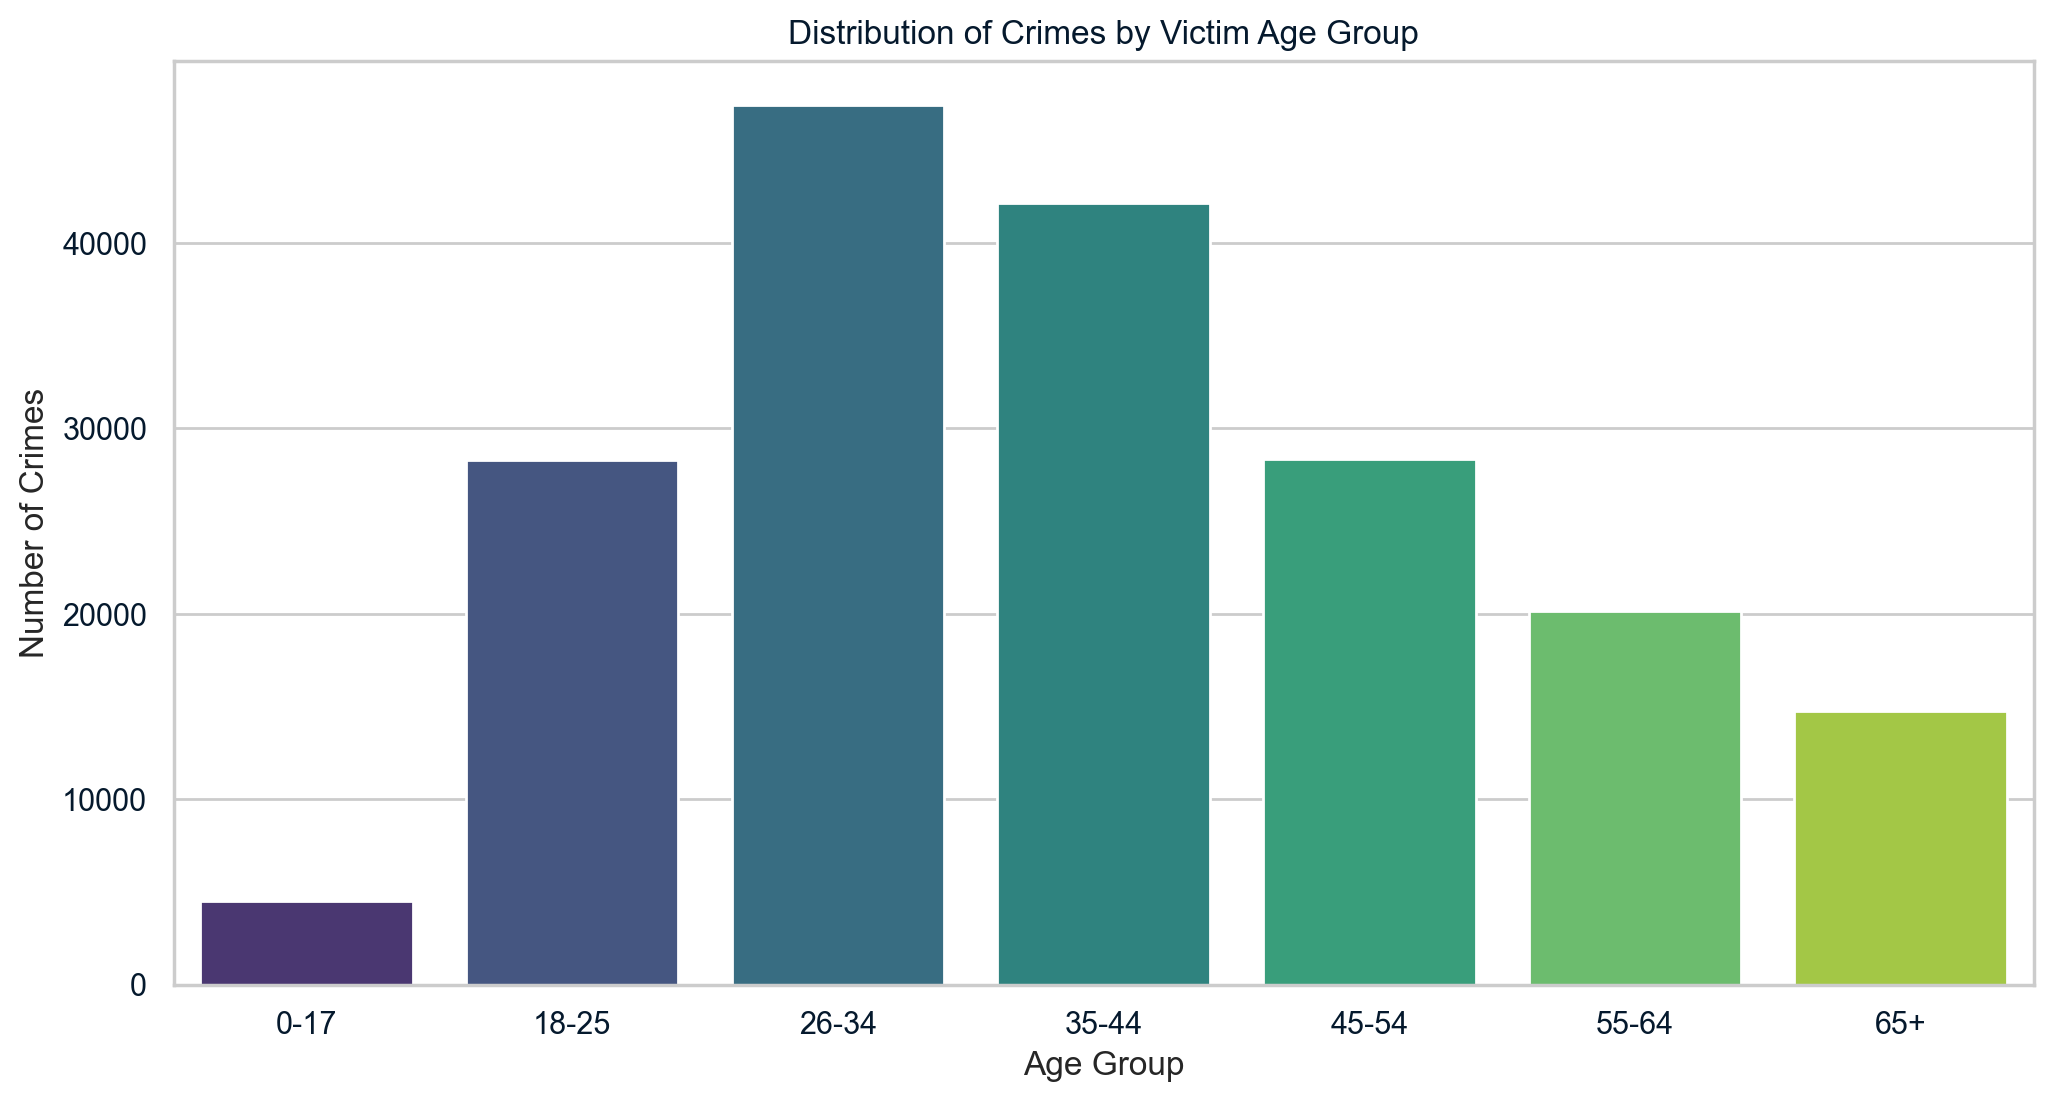

In [33]:
# Plot the distribution of crimes by age group
plt.figure(figsize=(12, 6))
sns.barplot(x=victim_ages.index, y=victim_ages.values, palette="viridis")
plt.title('Distribution of Crimes by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.show()